In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [67]:
def set_xylabels(x: str, y: str, title: str) -> None:
    """
    Sets the values for x and y labels for the plots
    Sets the value for title of the plots
    """ 
    plt.xlabel(x)
    plt.ylabel(y) 
    plt.title(title)

- We can start by looking at the data and understanding it

In [68]:
# Loading the data 
tips_dataset = pd.read_csv("tip.csv")
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
# Get the shape of the dataset 
tips_dataset.shape

(244, 7)

- The dataset has 244 rows and 7 columns 

In [70]:
# Check if there is any missing data 
tips_dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

- No missing values in the dataset

In [71]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Lets now start exploring the data through visualizations. Below questions will be uesed as a guide.

1. How does the distribution of tips change throughout the week? 

2. How does the distribution of total bills vary between weekdays and weekends? 

3. What is the relationship between party size and tip percentage?

4. Is there a difference in tipping behavior between lunch and dinner?

5. How does the tipping behavior vary by day of the week? 

6. What is the distribution of the total bills?

7. How do tips vary with the total bill amount?

8. Do smokers tend to tip differently that non-smokers?

### 1. How does the distribution of tips change throughout the week? 
- In this question, we shall use boxplots to illustrate the distribution of tips throughout the week. See below

In [72]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [73]:
# Checking the days of the week in the dataset 
tips_dataset.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

<Axes: xlabel='day', ylabel='tip'>

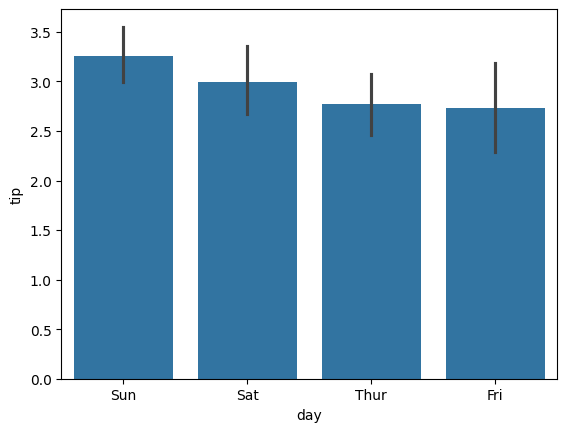

In [74]:
sns.barplot(tips_dataset, x="day", y="tip")

Text(0.5, 0, 'Day of the Week')

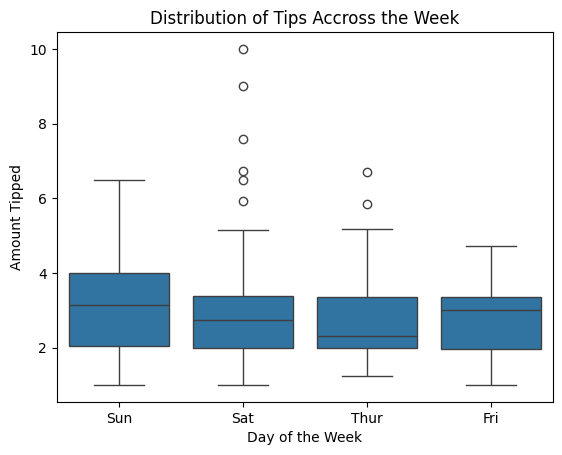

In [75]:
# We can also use boxplots to illustrate the same 
sns.boxplot(tips_dataset, x="day", y="tip") 

plt.title("Distribution of Tips Accross the Week")
plt.ylabel("Amount Tipped")
plt.xlabel("Day of the Week")

- As illustrated by the two plots, most of the tips were received on Sunday and Saturday with weekdays (Thursday and Friday) recording slightly lower tips. Most of the tips were on Sunday as the boxplot illustrates a higher median tip amount plus a wider spread of the amount tipped.

### 2. How does the distribution of total bills vary between weekdays and weekends? 
- We shall compare the distribution of total bills between weekdays and the weekends.
- This will be achieved through histograms, boxplots

In [76]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
# What is the distribution of total_bill over the week
tips_dataset.groupby("day").total_bill.agg("mean")

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

<Axes: xlabel='day', ylabel='total_bill'>

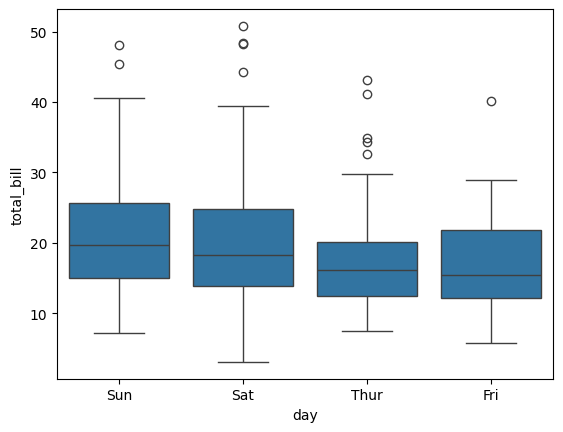

In [78]:
sns.boxplot(tips_dataset, x="day", y="total_bill")

- It can be seen that weekends (Saturday and Sunday) had a slightly higher median indicating that most of the total bills were paid over the weekend. Boxplots for Sunday and Saturday also have a wider spread of the total_bill paid. 
- Weekdays (Thur and Fri) recorded a slightly lower median than weekends with Friday recording the lowest median. 
- This observation suggest that total bill paid is influenced by the day of the week with higher total bills being received on weekends.

### 3. What is the relationship between party size and tip percentage?
 - tip percentage = tip amount / total bill amount

In [79]:
# Calculating the tip percentage
tips_dataset["tip_pc"] = (tips_dataset.tip / tips_dataset.total_bill) * 100
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Text(0.5, 0, 'Party Size')

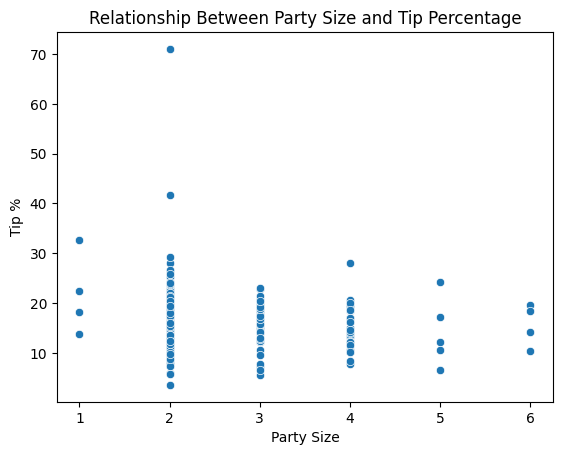

In [80]:
sns.scatterplot(tips_dataset, x="size", y="tip_pc") 

plt.title("Relationship Between Party Size and Tip Percentage")
plt.ylabel("Tip %")
plt.xlabel("Party Size")

### 4. Is there a difference in tipping behavior between lunch and dinner?

In [81]:
# We can look at the avg tiped amount for Dinner and Lunch 
tips_dataset.groupby("time").tip.agg("mean")

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

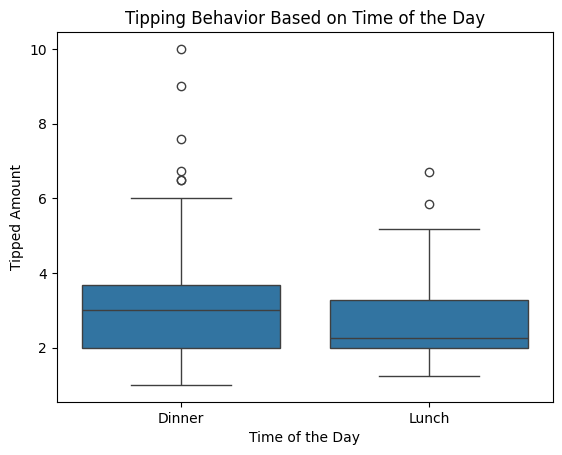

In [82]:
# Visualizing using boxplots
sns.boxplot(tips_dataset, x="time", y="tip")
set_xylabels("Time of the Day", "Tipped Amount", "Tipping Behavior Based on Time of the Day")

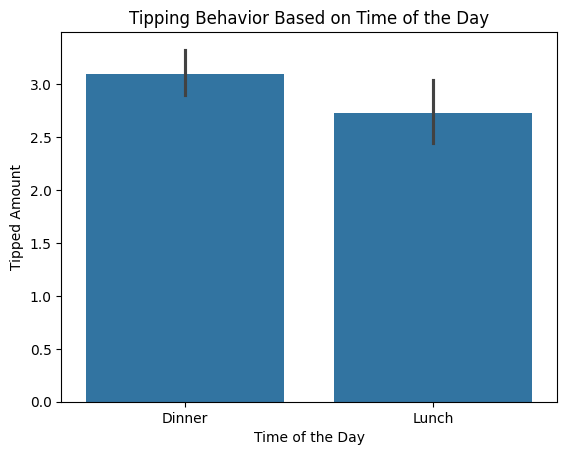

In [83]:
# Visualizing using barplot
sns.barplot(tips_dataset, x="time", y="tip")

set_xylabels("Time of the Day", "Tipped Amount", "Tipping Behavior Based on Time of the Day")

- From the observation, there is difference in tipping behavior between Dinner and Lunch. Dinner time had the highest median of tipped amount (3.0+) with a higher spread (as observed on boxplots) while Lunch time recorded the lowest median (approx 2.7).
- From the boxplots, extreme amounts were also given out as tips which was also not the case during Dinner time.

### 5. How does the tipping behavior vary by day of the week? 

In [84]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


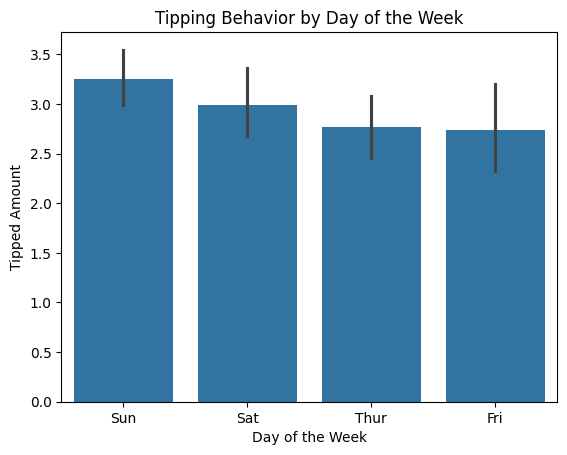

In [86]:
sns.barplot(tips_dataset, x="day", y="tip")
set_xylabels("Day of the Week", "Tipped Amount", "Tipping Behavior by Day of the Week")

### 6. What is the distribution of the total bills?

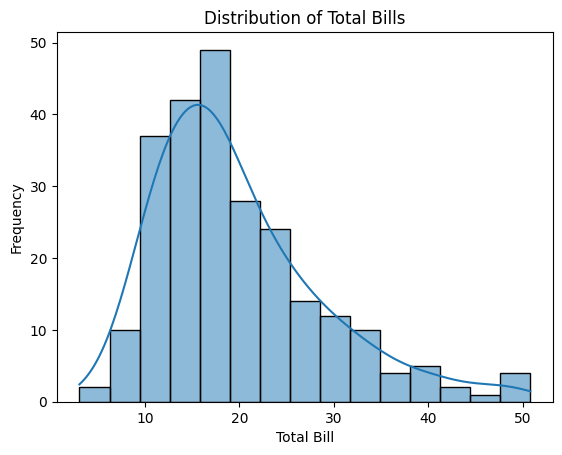

In [89]:
sns.histplot(data=tips_dataset, x="total_bill", bins=15, kde=True)
set_xylabels("Total Bill", "Frequency", "Distribution of Total Bills")

- Most of the customers paid between 10 and 25 dollars as the bill

### 7. How do tips vary with the total bill amount?

In [93]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


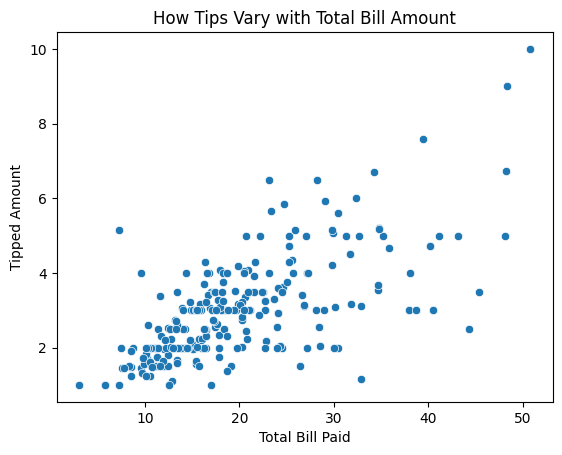

In [99]:
sns.scatterplot(tips_dataset, y="tip", x="total_bill")
set_xylabels("Total Bill Paid", "Tipped Amount", "How Tips Vary with Total Bill Amount")

- Tipped amount increased with increase in Total Bill Paid

### 8. Do smokers tend to tip differently that non-smokers?

In [101]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [103]:
tips_dataset.groupby("smoker").tip.agg("mean")

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

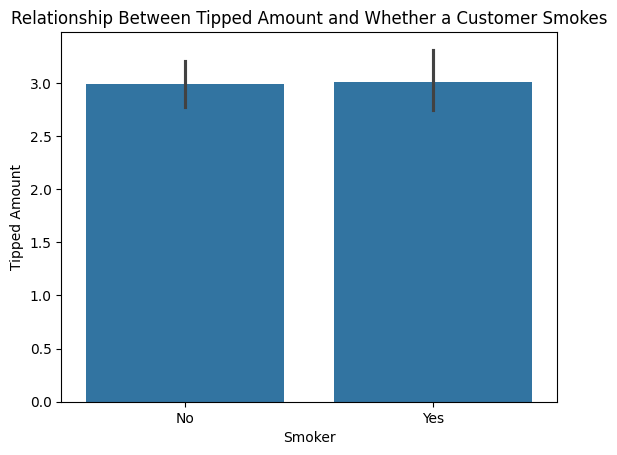

In [105]:
sns.barplot(tips_dataset, x="smoker", y="tip")
set_xylabels("Smoker", "Tipped Amount", "Relationship Between Tipped Amount and Whether a Customer Smokes")

- No significant difference between the amount tipped and whether a person smokes. The average tipped amount for smokers is 3.00 while that for non-smokers is 2.99. 
- We can therefore say that there are more significant factors that affects tipped amount other than whether a person is a smoker or not.

### 9. Whether there is a relationship between the tipped amount and the gender of the customer 

In [108]:
tips_dataset.groupby("sex").tip.agg("mean")

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

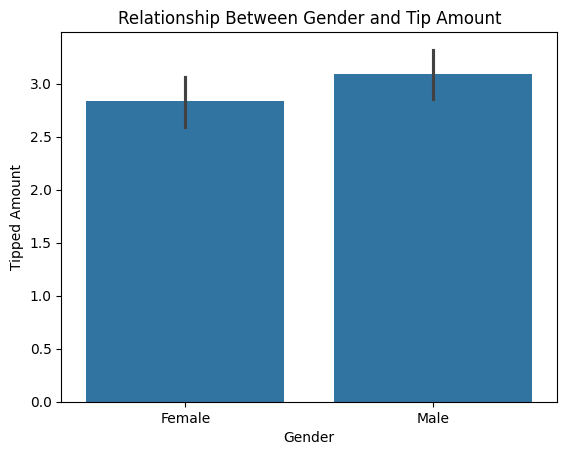

In [107]:
sns.barplot(tips_dataset, x="sex", y="tip")
set_xylabels("Gender", "Tipped Amount", "Relationship Between Gender and Tip Amount")

- Male Customers tend to tip more that female customers. However, the difference is not signicant indicating that there are more significant factors influencingn tip amount.

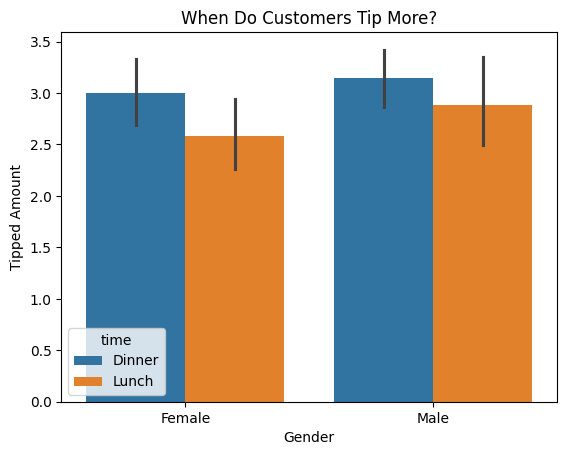

In [111]:
sns.barplot(tips_dataset, x="sex", y="tip", hue="time")
set_xylabels("Gender", "Tipped Amount", "When Do Customers Tip More?")

- Both men and women tend to tip more during dinner.

In [112]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
